```python
print "Hello World"
```

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', 10)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.min_rows', 26)
# pd.set_option('display.width', 70)

In [87]:
data = pd.read_csv('train.csv',index_col = 0)
# Cabin has many NaNs, Ticket is mostly text, and Name is entirely text so we'll drop them:
data = data.drop(columns = ['Name', 'Cabin', 'Ticket'])
data['Embarked'].fillna('S', inplace=True)
# modal port

# from sklearn.preprocessing import LabelEncoder

# gle_Sx=LabelEncoder()
# data['Sex'] = gle_Sx.fit_transform(data['Sex'])
# Sexes = {index: label for index, label in 
#                   enumerate(gle_Sx.classes_)}
# gle_Em = LabelEncoder()
# data['Embarked'] = gle_Em.fit_transform(data['Embarked'])
# Em_Codes = {index: label for index, label in 
#                   enumerate(gle_Em.classes_)}

# maybe reconsider this function:
def Agent(x,metric):
    if not np.isnan(x):
        return x
    rand = np.random.normal(metric.mean(),metric.std()/np.sqrt(metric.count()))
    while rand < 0 or rand > 100:
        rand = np.random.normal(metric.mean(),metric.std()/np.sqrt(metric.count()))
    return rand
    
data['Age'] = data['Age'].apply(Agent, metric=data['Age'].describe())

from sklearn.preprocessing import OneHotEncoder

Sx_Ohe = OneHotEncoder()
Sx_Ohe.fit(data[['Sex']])
columns = list(Sx_Ohe.categories_[0])
data[columns] = pd.DataFrame(Sx_Ohe.transform(data[['Sex']]).toarray(), columns=columns, index = data.index)

Em_Ohe = OneHotEncoder()
Em_Ohe.fit(data[['Embarked']])
columns = list(Em_Ohe.categories_[0])
data[columns] = pd.DataFrame(Em_Ohe.transform(data[['Embarked']]).toarray(), columns=columns, index = data.index)

Pclss_Ohe = OneHotEncoder()
Pclss_Ohe.fit(data[['Pclass']])
columns = ['Pclass_1','Pclass_2','Pclass_3']
data[columns] = pd.DataFrame(Pclss_Ohe.transform(data[['Pclass']]).toarray(), columns=columns, index = data.index)
data

Survived  Pclass     Sex        Age  SibSp  Parch     Fare  \
PassengerId                                                               
1                   0       3    male  22.000000      1      0   7.2500   
2                   1       1  female  38.000000      1      0  71.2833   
3                   1       3  female  26.000000      0      0   7.9250   
4                   1       1  female  35.000000      1      0  53.1000   
5                   0       3    male  35.000000      0      0   8.0500   
...               ...     ...     ...        ...    ...    ...      ...   
887                 0       2    male  27.000000      0      0  13.0000   
888                 1       1  female  19.000000      0      0  30.0000   
889                 0       3  female  71.092055      1      2  23.4500   
890                 1       1    male  26.000000      0      0  30.0000   
891                 0       3    male  32.000000      0      0   7.7500   

            Embarked  female  male    C    Q    S  Pclass_1  Pclass_2  \
PassengerId                                                             
1                  S     0.0   1.0  0.0  0.0  1.0       0.0       0.0   
2                  C     1.0   0.0  1.0  0.0  0.0       1.0       0.0   
3                  S     1.0   0.0  0.0  0.0  1.0       0.0       0.0   
4                  S     1.0   0.0  0.0  0.0  1.0       1.0       0.0   
5                  S     0.0   1.0  0.0  0.0  1.0       0.0       0.0   
...              ...     ...   ...  ...  ...  ...       ...       ...   
887                S     0.0   1.0  0.0  0.0  1.0       0.0       1.0   
888                S     1.0   0.0  0.0  0.0  1.0       1.0       0.0   
889                S     1.0   0.0  0.0  0.0  1.0       0.0       0.0   
890                C     0.0   1.0  1.0  0.0  0.0       1.0       0.0   
891                Q     0.0   1.0  0.0  1.0  0.0       0.0       0.0   

             Pclass_3  
PassengerId            
1                 1.0  
2                 0.0  
3                 1.0  
4                 0.0  
5                 1.0  
...               ...  
887               0.0  
888               0.0  
889               1.0  
890               0.0  
891               1.0  

[891 rows x 16 columns]

In [5]:
# now we want to check for correlations between
# different features and the target:
# we'd like to visualize them so let's import and setup matplotlib
import seaborn as sns
%matplotlib inline

def correlation_matrix(df: pd.DataFrame):
    """
    A function to calculate and plot
    correlation matrix of a DataFrame.
    """
    # Create the matrix
    matrix = df.corr()
    
    # Create cmap
    cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
    # Create a mask
    mask = np.triu(np.ones_like(matrix, dtype=bool))
    
    # Make figsize bigger
    fig, ax = plt.subplots(figsize=(16,12))
    
    # Plot the matrix
    _ = sns.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap, ax=ax)

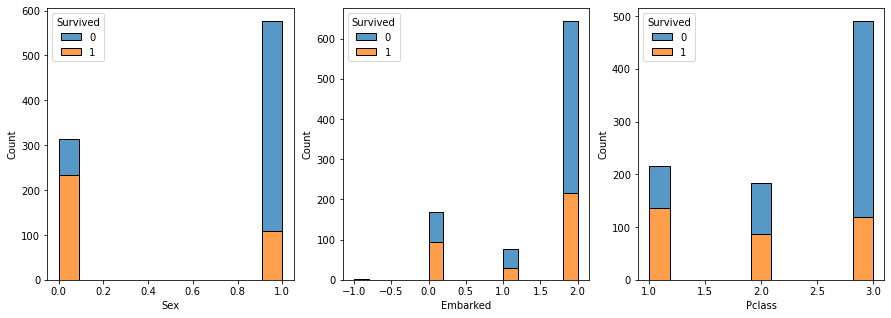

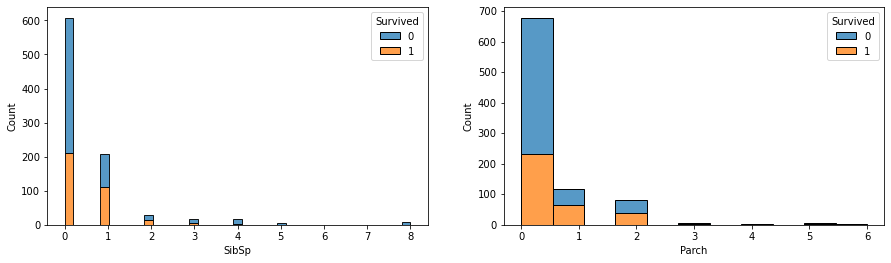

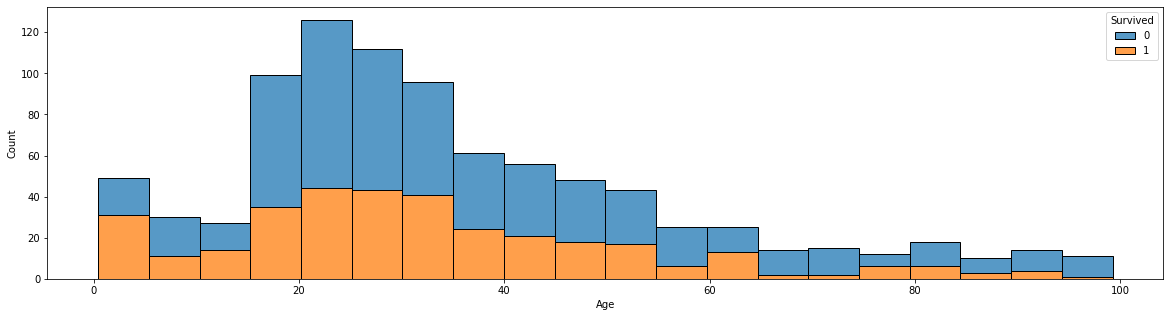

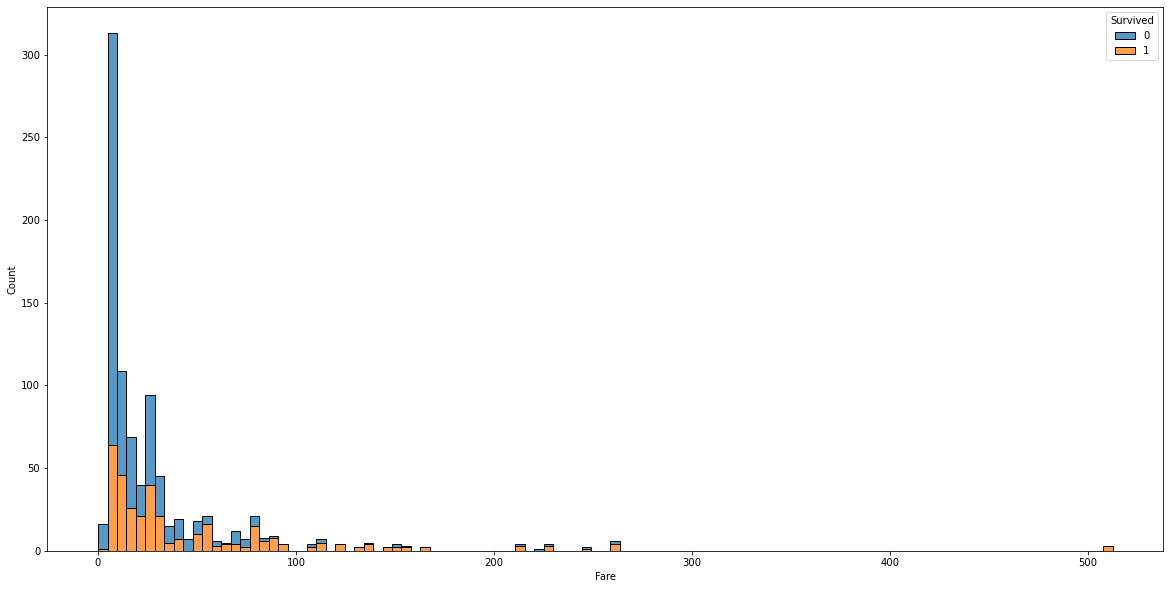

In [31]:
# Let's look at distributions of Survived at different age groups
# and different Pclasses

fig, axes = plt.subplots(1,3, figsize=(15, 5))

sns.histplot(data=data, x="Sex", hue="Survived", multiple="stack",ax=axes[0])
sns.histplot(data=data, x="Embarked", hue="Survived", multiple="stack",ax=axes[1])
sns.histplot(data=data, x="Pclass", hue="Survived", multiple="stack",ax=axes[2])
fig, axes = plt.subplots(1,2, figsize=(15, 4))
sns.histplot(data=data, x="SibSp", hue="Survived", multiple="stack",ax=axes[0])
sns.histplot(data=data, x="Parch", hue="Survived", multiple="stack",ax=axes[1])


fig, axes = plt.subplots(1,1, figsize=(20, 5))
sns.histplot(data=data, x="Age", hue="Survived", multiple="stack",ax=axes)

fig, axes = plt.subplots(1,1, figsize=(20, 10))
sns.histplot(data=data, x="Fare", hue="Survived", multiple="stack",ax=axes)

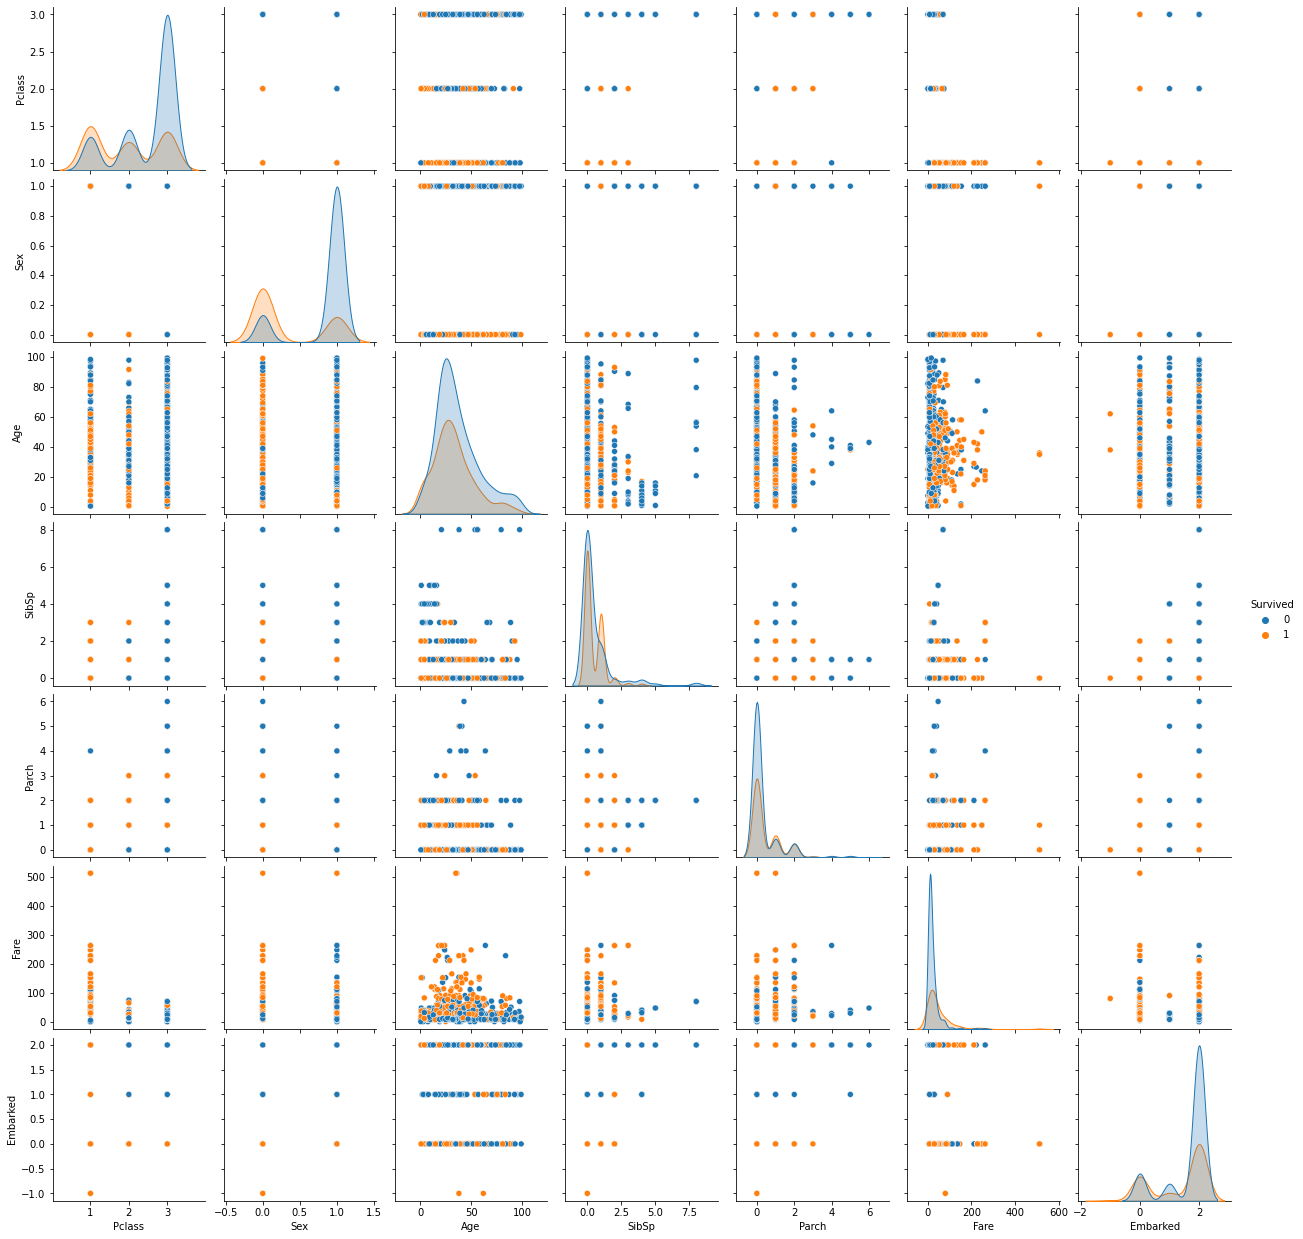

In [33]:
sns.pairplot(data, hue="Survived")

In [ ]:
# possiblities from here:
# * we train different models for different groups (i.e. a seperate model for men and a seperate model for women)
# * we could try to create new features: total family size, Fare/Pclass (creates better seperation)
# * we could also try a new type of feature: has_more_than_one_sibling, has_any_family, is_below_15,
#   paid_above_60, 

In [11]:
# We've now shoved all the poor people to the start, and most deaths are now in the lower portion.
# I'd like to believe that thiBs is a better feature.

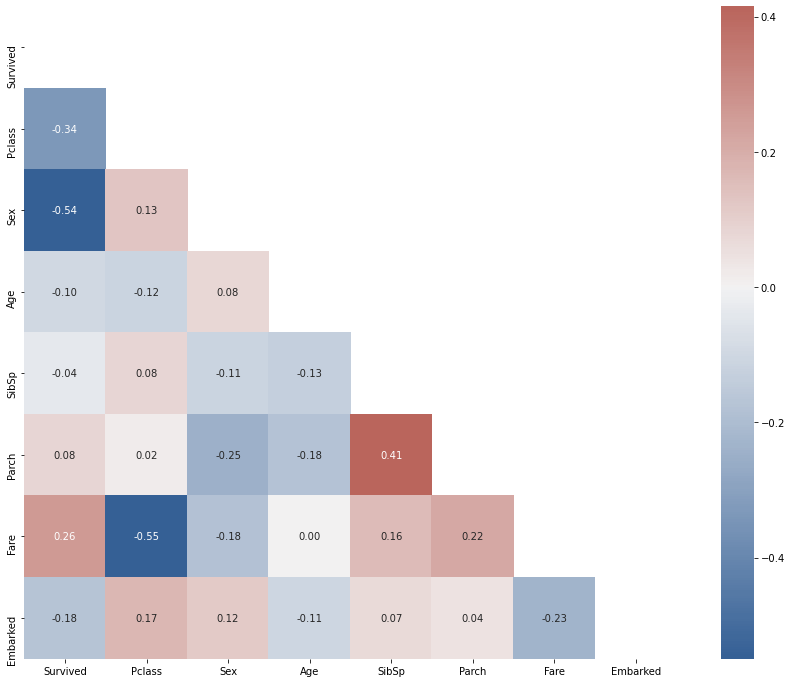

In [34]:
correlation_matrix(data)

In [94]:
# let's calculate the different % that survived for a True/False feature:
def percent_Survived(df, feature, target='Survived',multi=True):
    Survv = df[feature][df[target] == 1]
    return Survv.sum() * (1 + 99 * multi) / (df[feature][df[feature] == 1].size)

from sklearn.preprocessing import Binarizer

Fam_Bn = Binarizer(threshold=0.9)
data['Has_Fam'] = Fam_Bn.transform([data['Parch'] + data['SibSp']])[0]
data['Has_Sib'] = Fam_Bn.transform([data['SibSp']])[0]
data

Survived  Pclass     Sex        Age  SibSp  Parch     Fare  \
PassengerId                                                               
1                   0       3    male  22.000000      1      0   7.2500   
2                   1       1  female  38.000000      1      0  71.2833   
3                   1       3  female  26.000000      0      0   7.9250   
4                   1       1  female  35.000000      1      0  53.1000   
5                   0       3    male  35.000000      0      0   8.0500   
...               ...     ...     ...        ...    ...    ...      ...   
887                 0       2    male  27.000000      0      0  13.0000   
888                 1       1  female  19.000000      0      0  30.0000   
889                 0       3  female  71.092055      1      2  23.4500   
890                 1       1    male  26.000000      0      0  30.0000   
891                 0       3    male  32.000000      0      0   7.7500   

            Embarked  female  male    C    Q    S  Pclass_1  Pclass_2  \
PassengerId                                                             
1                  S     0.0   1.0  0.0  0.0  1.0       0.0       0.0   
2                  C     1.0   0.0  1.0  0.0  0.0       1.0       0.0   
3                  S     1.0   0.0  0.0  0.0  1.0       0.0       0.0   
4                  S     1.0   0.0  0.0  0.0  1.0       1.0       0.0   
5                  S     0.0   1.0  0.0  0.0  1.0       0.0       0.0   
...              ...     ...   ...  ...  ...  ...       ...       ...   
887                S     0.0   1.0  0.0  0.0  1.0       0.0       1.0   
888                S     1.0   0.0  0.0  0.0  1.0       1.0       0.0   
889                S     1.0   0.0  0.0  0.0  1.0       0.0       0.0   
890                C     0.0   1.0  1.0  0.0  0.0       1.0       0.0   
891                Q     0.0   1.0  0.0  1.0  0.0       0.0       0.0   

             Pclass_3  Has_Fam  Has_Sib  
PassengerId                              
1                 1.0        1        1  
2                 0.0        1        1  
3                 1.0        0        0  
4                 0.0        1        1  
5                 1.0        0        0  
...               ...      ...      ...  
887               0.0        0        0  
888               0.0        0        0  
889               1.0        1        1  
890               0.0        0        0  
891               1.0        0        0  

[891 rows x 18 columns]

In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

drop_features1 = ['Survived','Pclass','Sex','SibSp','Parch','Embarked']
drop_features2 = drop_features1 + ['male','Has_Sib']

logreg = LogisticRegression(solver='liblinear',penalty='l2',C=1,tol=0.0001,random_state=4,warm_start=True)
Forest = RandomForestClassifier(n_estimators=150, max_depth = 7, random_state=4)
X1 = data[data.columns.drop(drop_features1)]
X2 = data[data.columns.drop(drop_features2)]
y = data['Survived']
# print(cross_val_score(Forest,X1,y,cv=10,scoring='accuracy').mean()) 0.8137702871410737
# print(cross_val_score(Forest,X2,y,cv=10,scoring='accuracy').mean()) 0.8070037453183521
print(cross_val_score(logreg,X1,y,cv=10,scoring='accuracy').mean())
print(cross_val_score(logreg,X2,y,cv=10,scoring='accuracy').mean())

0.7934956304619226
0.7935081148564295


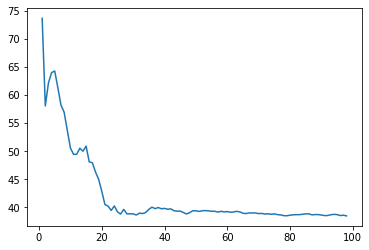

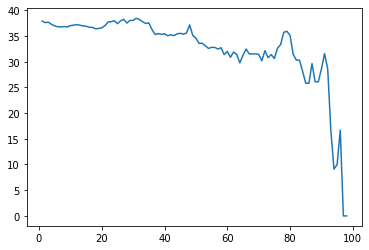

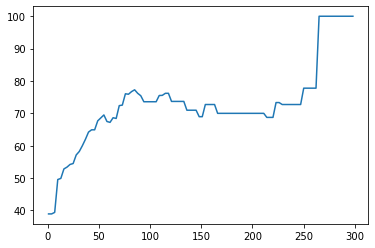

In [14]:
df = pd.DataFrame(index=data.index)
df['Survived'] = data['Survived']
Perc_Less = []
Perc_More = []
age_range = range(1,99)
for Age in age_range:
    df['Less_Age'] = data['Age'] <= Age
    df['More_Age'] = data['Age'] >= Age
    Perc_Less.append(percent_Survived(df,'Less_Age'))
    Perc_More.append(percent_Survived(df,'More_Age'))
    
plt.plot(age_range, Perc_Less)
plt.show()
# we'll pick 17
plt.plot(age_range, Perc_More)
plt.show()
# and 63, the minimum

Perc_Fare = []
Fare_range = range(1,300, 3)
for Fare in Fare_range:
    df['Less_Fare'] = data['Fare'] >= Fare
    Perc_Fare.append(percent_Survived(df,'Less_Fare'))

plt.plot(Fare_range, Perc_Fare)
# we'll pick 50